In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
retail_data = pd.read_csv("/content/sale.csv")
retail_data.head()

,Unnamed: 0,Unnamed: 0.1,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept,Date
0,0,-1.732047,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,...,0.024121,1,1,False,False,1,0,0,19213.485088,2010-02-05
1,1,-1.732038,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,...,0.024121,1,2,False,False,1,0,0,43607.020113,2010-02-05
2,2,-1.732030,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,...,0.024121,1,3,False,False,1,0,0,11793.698516,2010-02-05
3,3,-1.732022,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,...,0.024121,1,4,False,False,1,0,0,25974.630238,2010-02-05
4,4,-1.732014,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,...,0.024121,1,5,False,False,1,0,0,21365.583515,2010-02-05


In [ ]:
retail_data.drop(['Unnamed: 0'], axis=1, inplace=True)

## Modeling

##  Time series analysis:
- Any data(Seq of observations) recorded with some fixed interval of time is called as time series data. This fixed interval can be hourly, daily, monthly or yearly.

- In time series data, time will always be independent variable and there can be one or many dependent variable.

- Objective of time series analysis is to understand how change in time affect the dependent variables and accordingly predict values for future time intervals.

In [ ]:
retail_data.dtypes

Unnamed: 0.1              float64
Weekly_Sales              float64
Size                      float64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
Month                     float64
AvgWeeklySalesperStore    float64
AverageMonthlySales       float64
Store                       int64
Dept                        int64
IsHoliday_x                  bool
IsHoliday_y                  bool
Type_A                      int64
Type_B                      int64
Type_C                      int64
AvgWeeklySalesperDept     float64
Date                       object
dtype: object

In [ ]:
retail_data['Date']= pd.to_datetime(retail_data['Date'])
retail_data.set_index('Date', inplace=True)

In [ ]:
retail_data.head()

,Unnamed: 0.1,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,AvgWeeklySalesperStore,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,-1.732047,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,1,False,False,1,0,0,19213.485088
2010-02-05,-1.732038,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,2,False,False,1,0,0,43607.020113
2010-02-05,-1.732030,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,3,False,False,1,0,0,11793.698516
2010-02-05,-1.732022,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,4,False,False,1,0,0,25974.630238
2010-02-05,-1.732014,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,5,False,False,1,0,0,21365.583515


In [ ]:
Time_Seriesdata= retail_data[['AvgWeeklySalesperDept']]

In [ ]:
Time_Seriesdata.head()

,AvgWeeklySalesperDept
Date,
2010-02-05,19213.485088
2010-02-05,43607.020113
2010-02-05,11793.698516
2010-02-05,25974.630238
2010-02-05,21365.583515


In [ ]:
y= Time_Seriesdata.AvgWeeklySalesperDept

<Axes: xlabel='Date'>

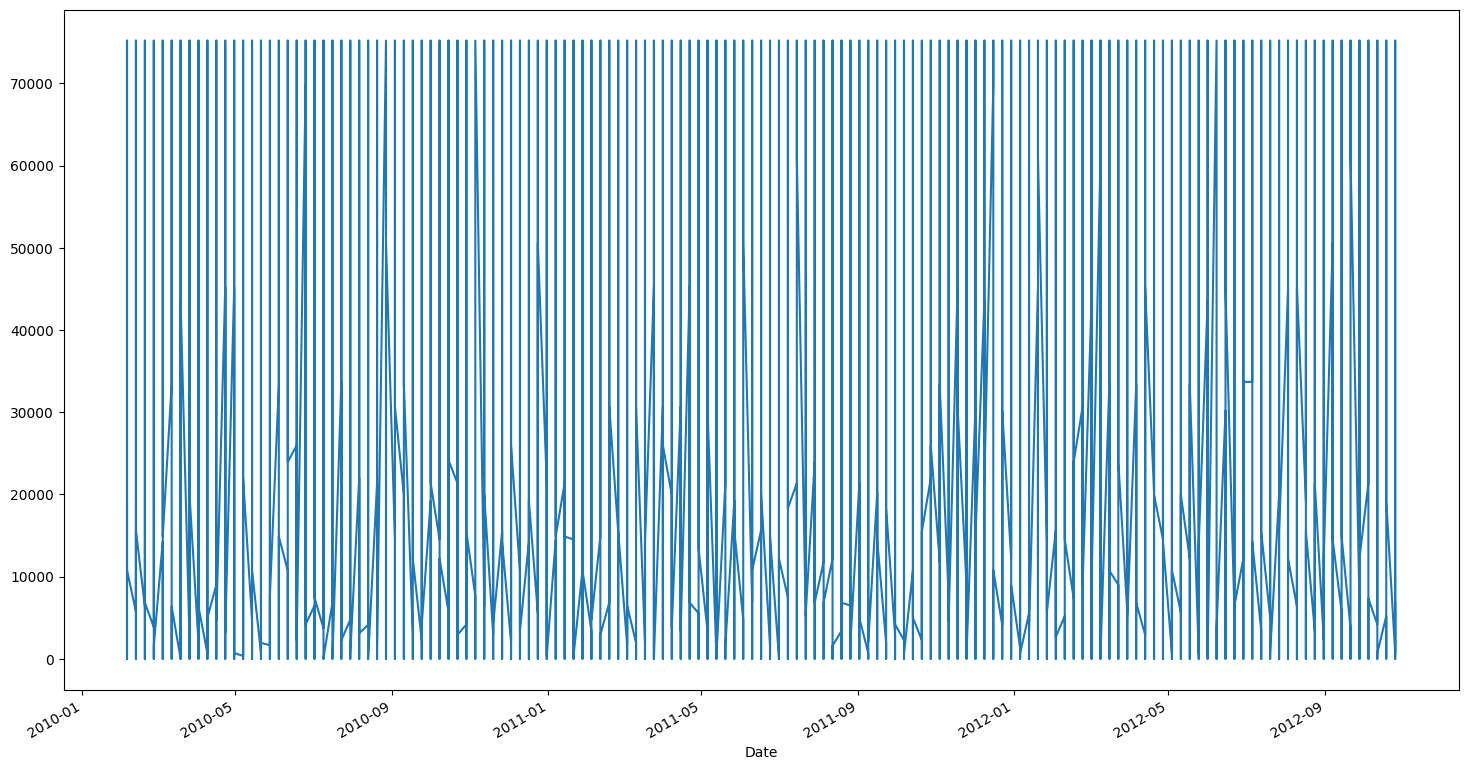

In [ ]:
plt.figure(figsize=(18,10))
y.plot()

## We can notice from the plot of y,
- The plot is not clean. It shows that y has lot of overlapping data. It represents overall Weekly Sales(per department, per store, per week etc).
- So let's group it by date, and predict the Department-wise sales for the following year.

In [ ]:
Time_Seriesdata= Time_Seriesdata.groupby('Date').sum()

In [ ]:
Time_Seriesdata.head()

,AvgWeeklySalesperDept
Date,
2010-02-05,4.680998e+07
2010-02-12,4.695113e+07
2010-02-19,4.712124e+07
2010-02-26,4.681797e+07
2010-03-05,4.671044e+07


In [ ]:
y= Time_Seriesdata.AvgWeeklySalesperDept

<Axes: xlabel='Date'>

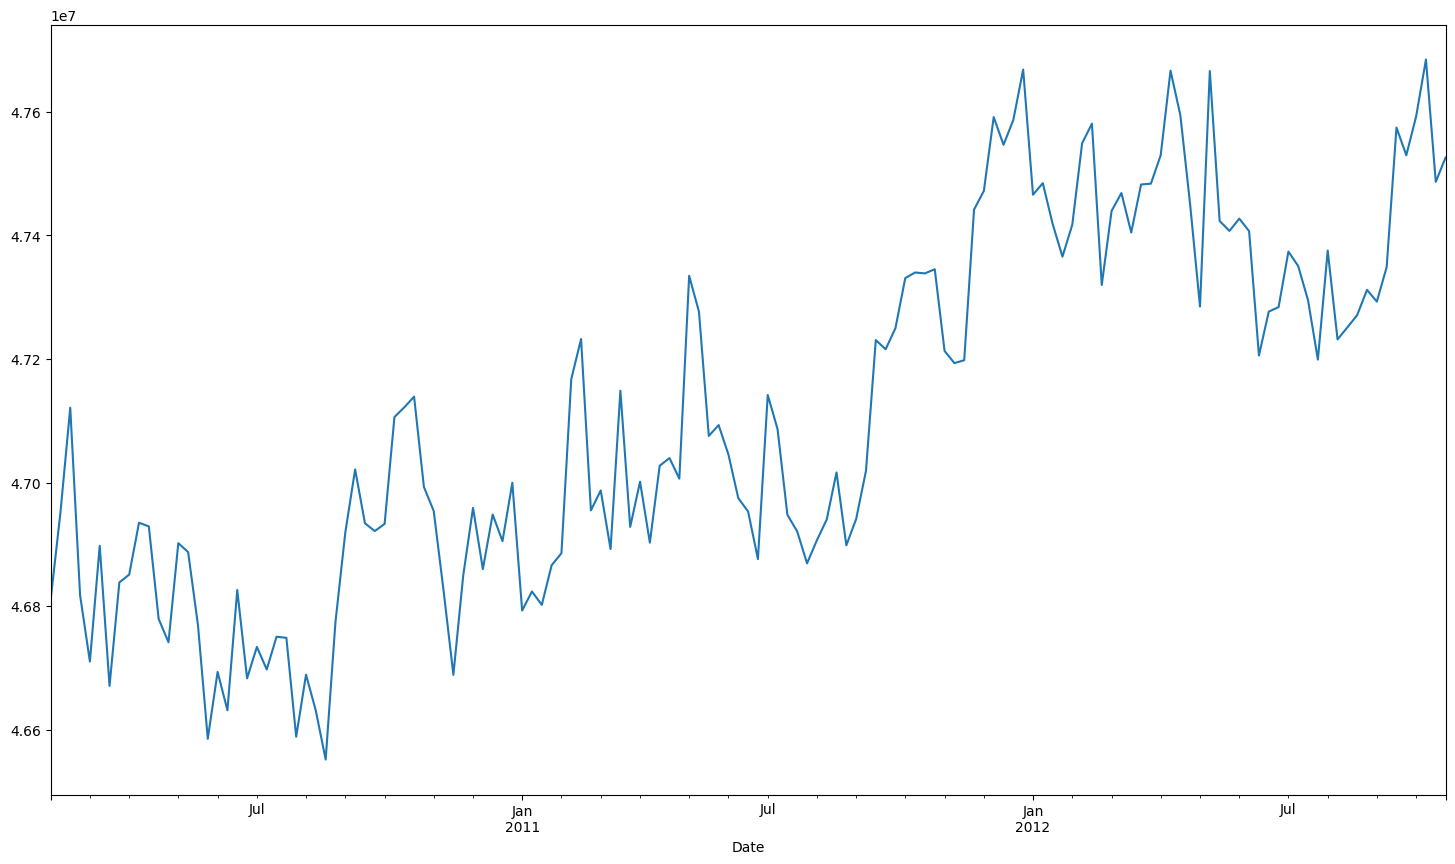

In [ ]:
plt.figure(figsize=(18,10))
y.plot()

## The graph looks pretty clean now. No overlapping data.
- Our plot also shows seasonality. An important feature to be analyzed in a Time Series is the seasonality.
- We have to now decompose the data to see it's Trend, Level and Noise.

## Patterns in Time Series Data
# Decomposition:
# Trend-->
  A trend is observed when there is an increasing or decreasing slope observed in the time series.Trend represent the change in dependent variables with respect to time from start to end.
# Seasonality-->
Whereas seasonality is observed when there is a distinct   
repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.
# Irregularities-->
This is also called as noise. Strange dips and jump in the data are called as irregularities. These fluctuations are caused by uncontrollable events like earthquakes, wars, flood, pandemic etc.

Additive time series:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

# classical decomposition-
Of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.



In [ ]:
#resample the data (per month)
y = Time_Seriesdata['AvgWeeklySalesperDept'].resample('M').sum()

In [ ]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition= seasonal_decompose(y)

<Figure size 2000x1000 with 0 Axes>

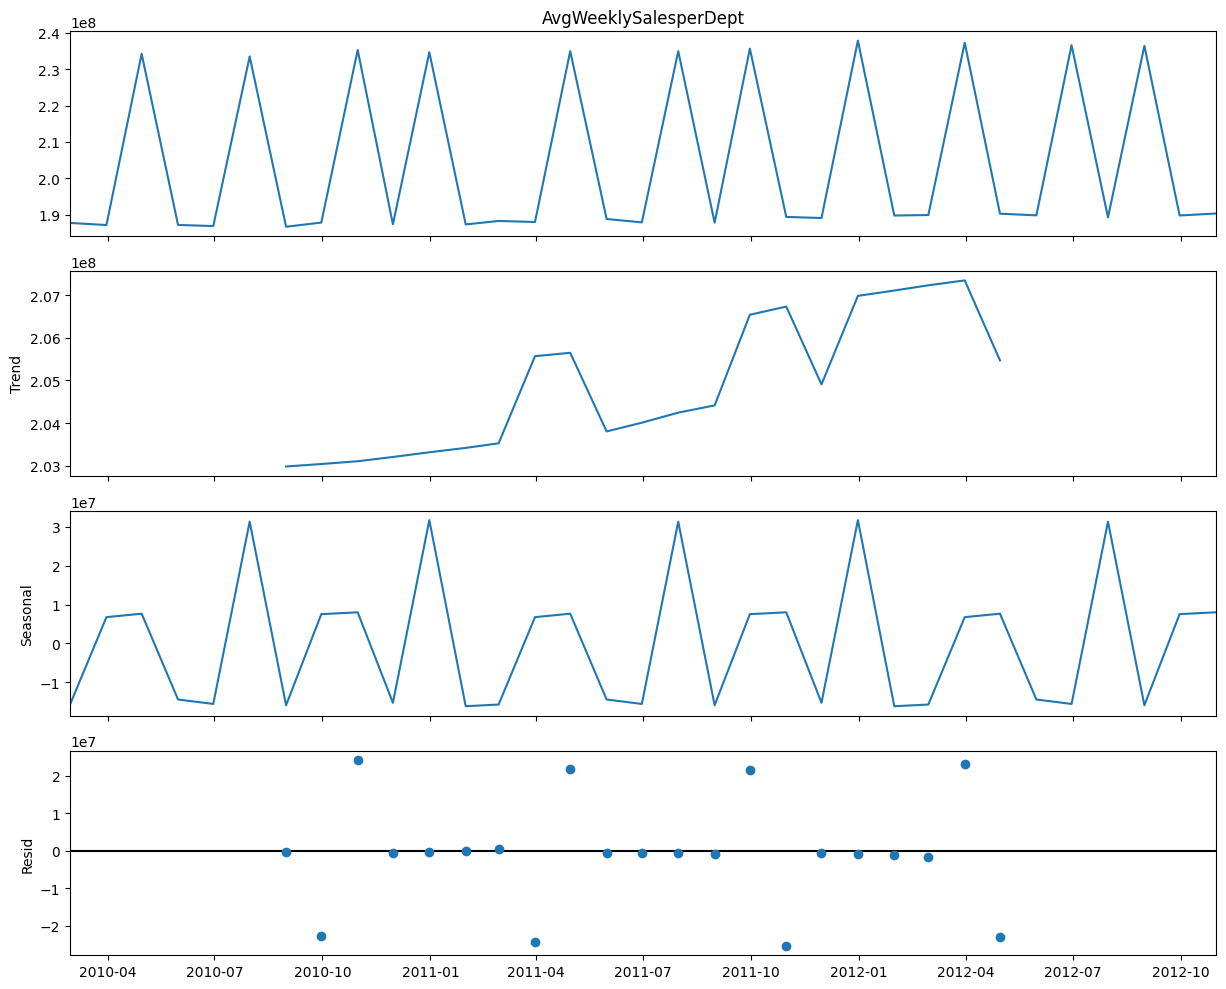

In [ ]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [ ]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(y, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive', extrapolate_trend='freq')


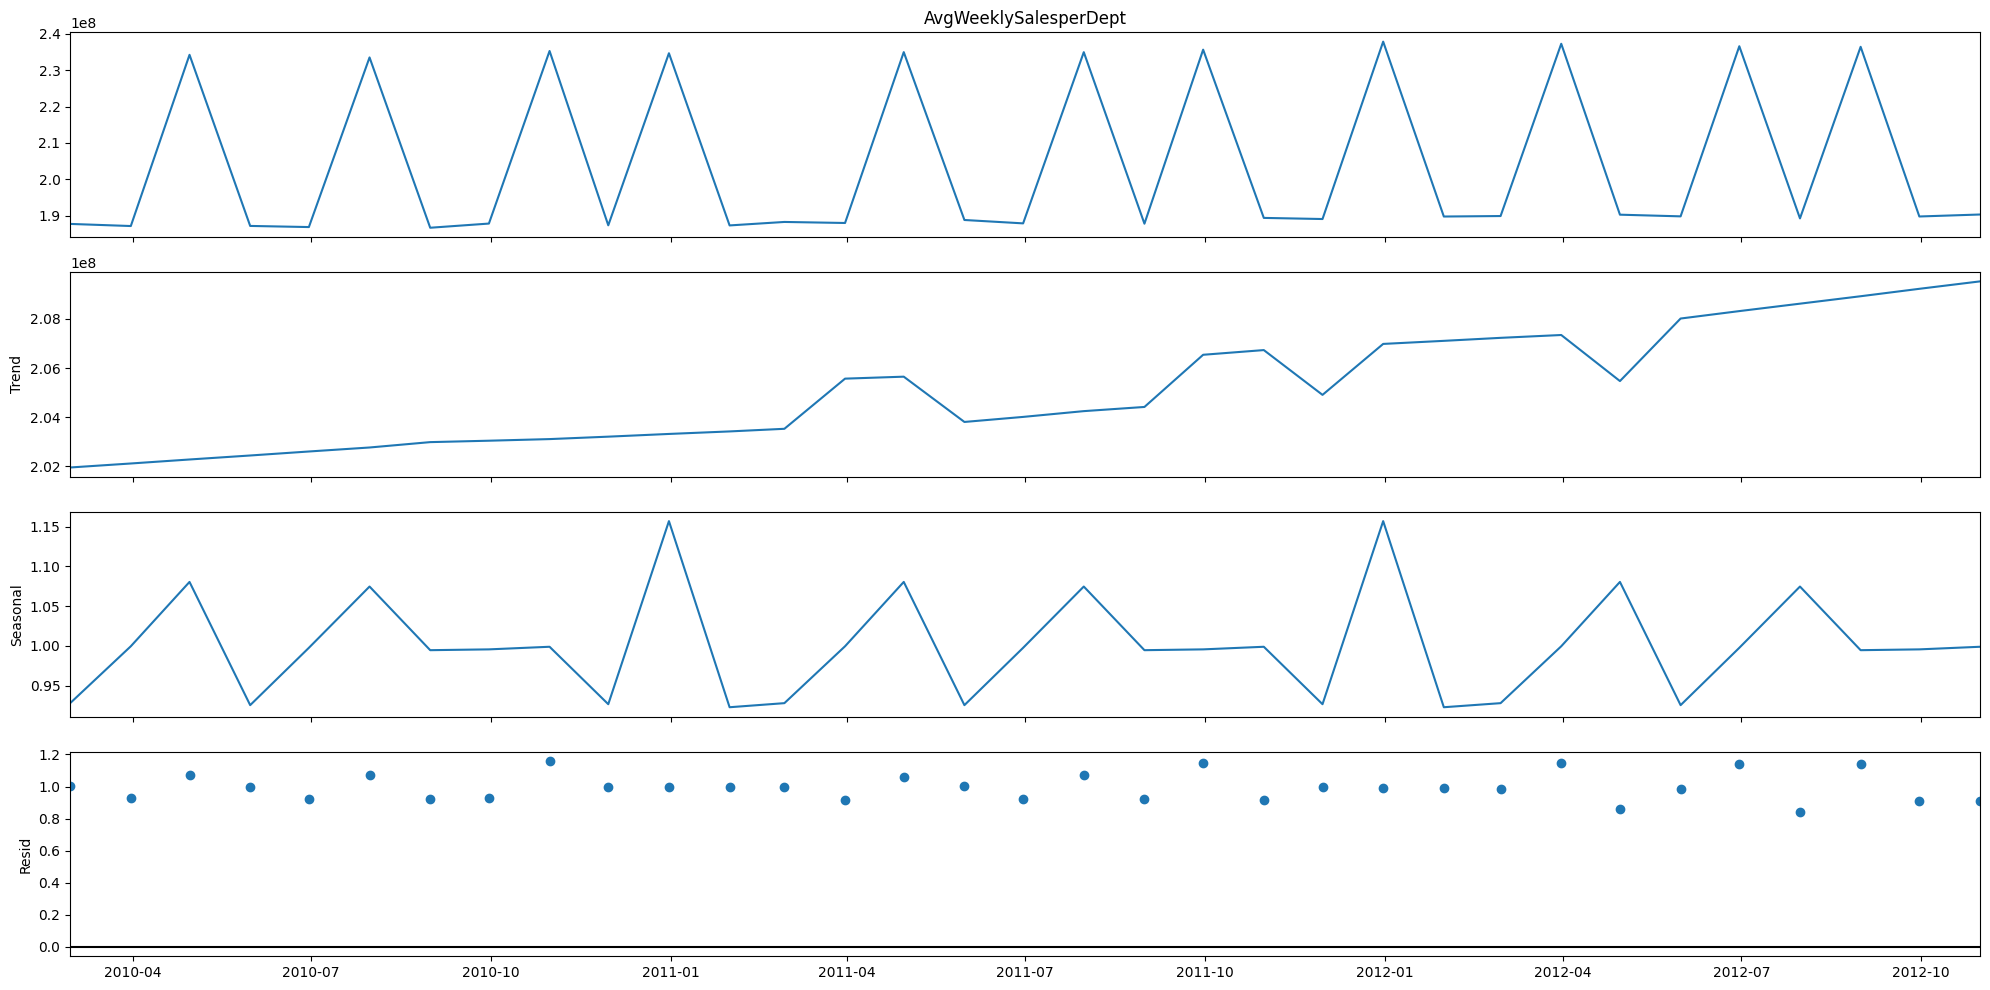

In [ ]:
# Multiplicative Decomposition
plt.rcParams.update({'figure.figsize': (20,10)})
result_mul.plot()
plt.show()


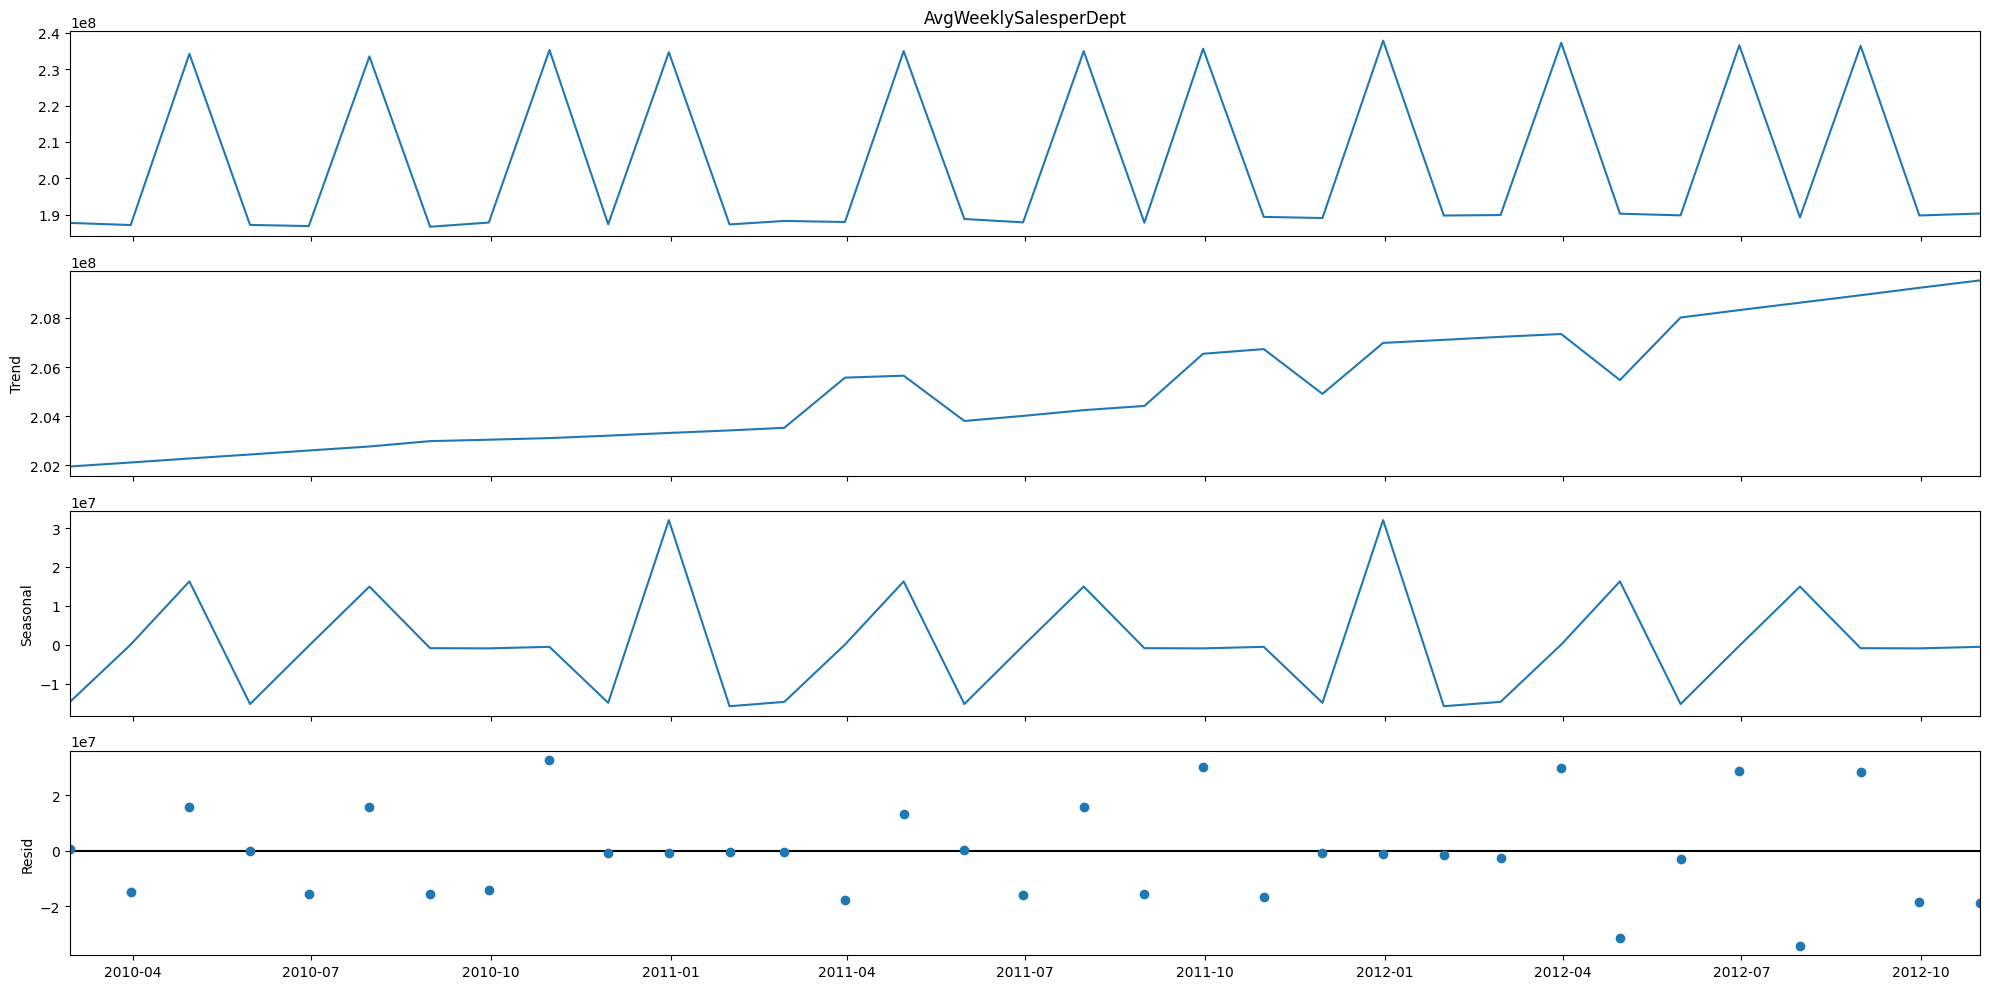

In [ ]:
# Additive Decomposition
result_add.plot()
plt.show()

## Stationarity

- For accurate analysis and forecasting trend,seasonality is removed from the time series and converted it into stationary series.
- Time series data is said to be stationary when statistical properties like mean, standard deviation are constant and there is no seasonality.
- In other words statistical properties of the time series data should not be a function of time.

You can make series stationary by:
- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above
- The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

## There are multiple implementations of Unit Root tests(quantitatively determine if a given series is stationary or not) like:

- Augmented Dickey Fuller test (ADH Test)
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
- Philips Perron test (PP Test)

## Test for stationarity:

KPSS test:

p-value > 0.05: stationary.

p-value <= 0.05: non-stationary.

## ADH test:
- The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary

p-value > 0.05: non-stationary.

p-value <= 0.05: stationary.

In [ ]:
# KPSS
#The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test
from statsmodels.tsa.stattools import kpss
kpss(y,nlags="auto")

<ipython-input-97-10f3fe73fd01>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(y,nlags="auto")


(0.28398125715986444,
 0.1,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## data is stationary

In [ ]:
# adfuller test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                -9.355249e+00
p-value                        8.092178e-16
#Lags Used                     1.000000e+00
Number of Observations Used    3.100000e+01
Critical Value (1%)           -3.661429e+00
Critical Value (5%)           -2.960525e+00
Critical Value (10%)          -2.619319e+00
dtype: float64


## According to Augmented Dickey-Fullet test, the p-value is 0.08, not less than 0.05 which means we accept the null hypothesis that our data is not stationary.

<Axes: xlabel='Date'>

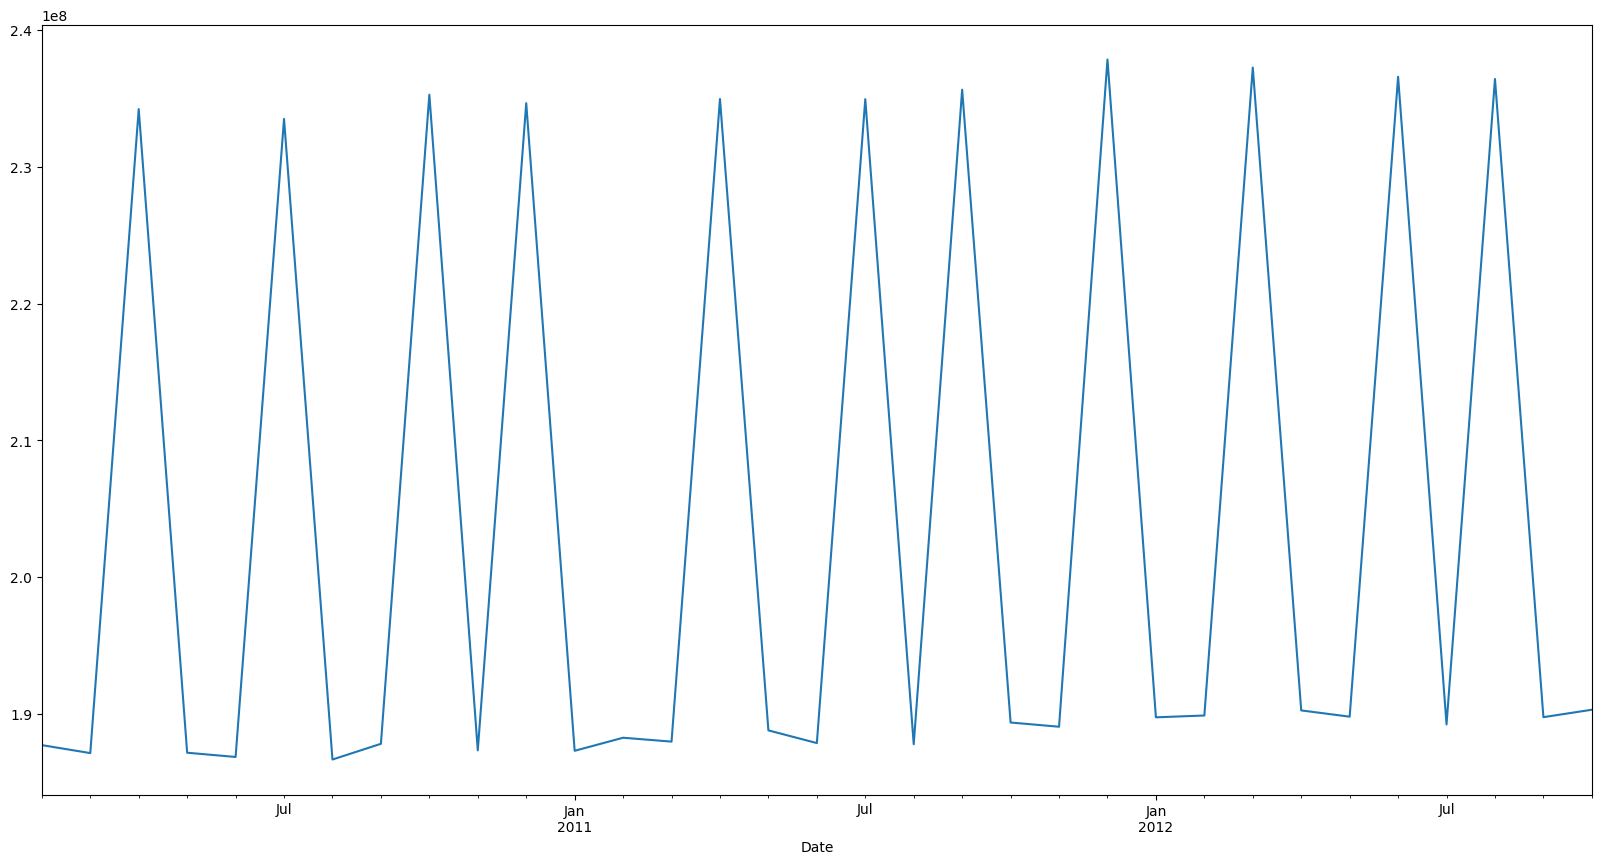

In [ ]:
y.plot()

In [ ]:
y_log = np.log(y)

<Axes: xlabel='Date'>

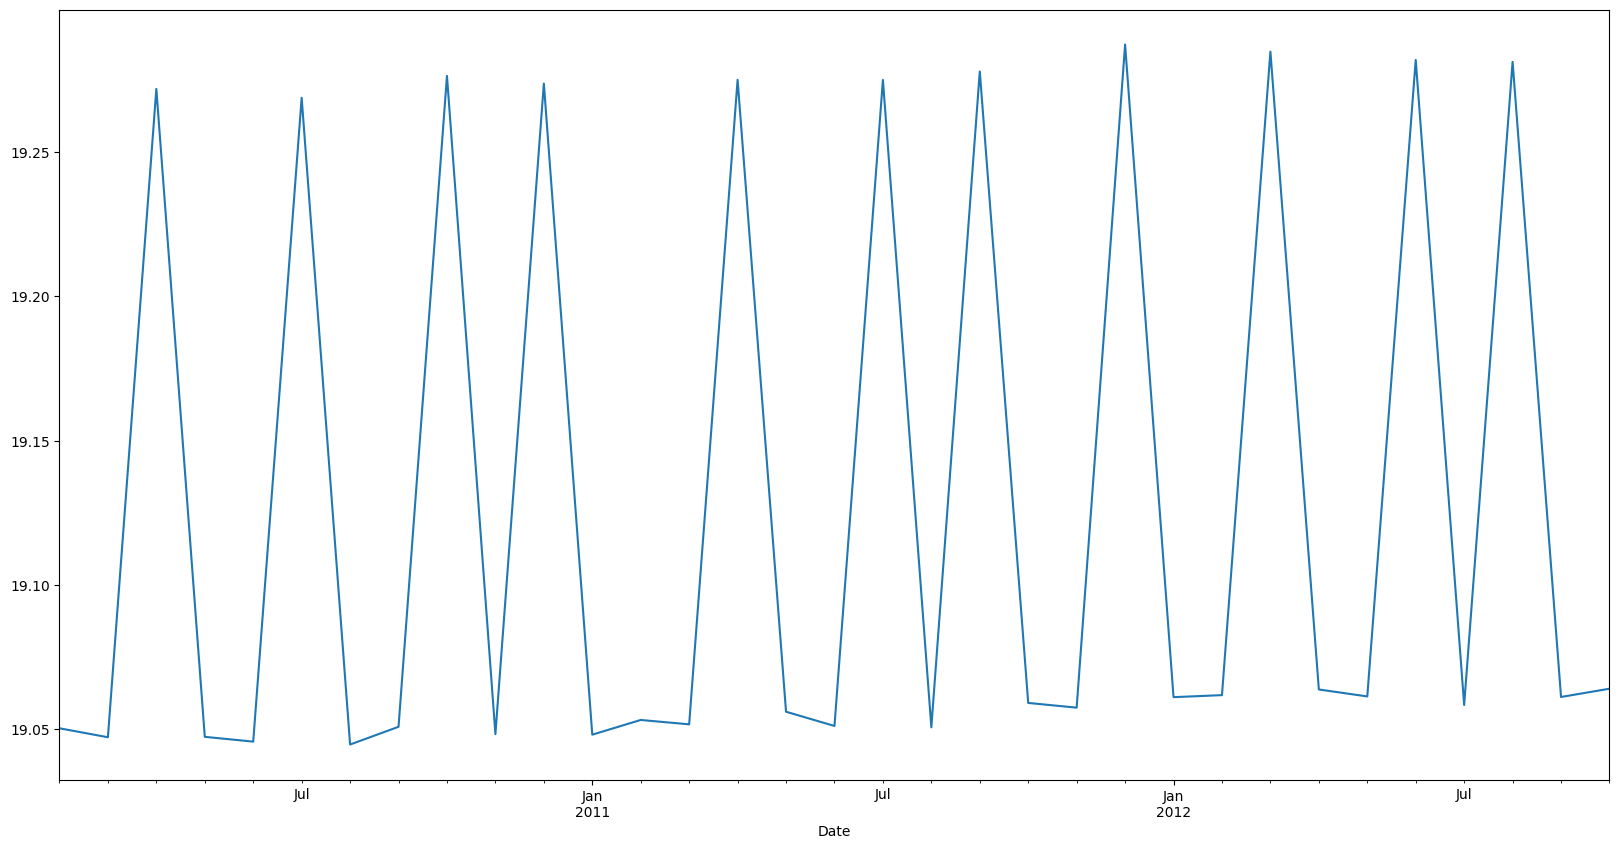

In [ ]:
y_log.plot()

In [ ]:
y_log_diff= y_log.diff()

In [ ]:
y_log_diff

Date
2010-02-28         NaN
2010-03-31   -0.003109
2010-04-30    0.224593
2010-05-31   -0.224450
2010-06-30   -0.001657
2010-07-31    0.223043
2010-08-31   -0.224049
2010-09-30    0.006141
2010-10-31    0.225474
2010-11-30   -0.228026
2010-12-31    0.225385
2011-01-31   -0.225560
2011-02-28    0.005090
2011-03-31   -0.001509
2011-04-30    0.223278
2011-05-31   -0.218910
2011-06-30   -0.004938
2011-07-31    0.223800
2011-08-31   -0.224269
2011-09-30    0.227202
2011-10-31   -0.218753
2011-11-30   -0.001631
2011-12-31    0.229714
2012-01-31   -0.226079
2012-02-29    0.000697
2012-03-31    0.222913
2012-04-30   -0.220948
2012-05-31   -0.002415
2012-06-30    0.220499
2012-07-31   -0.223473
2012-08-31    0.222800
2012-09-30   -0.220015
2012-10-31    0.002863
Freq: M, Name: AvgWeeklySalesperDept, dtype: float64

In [ ]:
#Drop all NaN values
y_log_diff.dropna(inplace=True)

<Axes: xlabel='Date'>

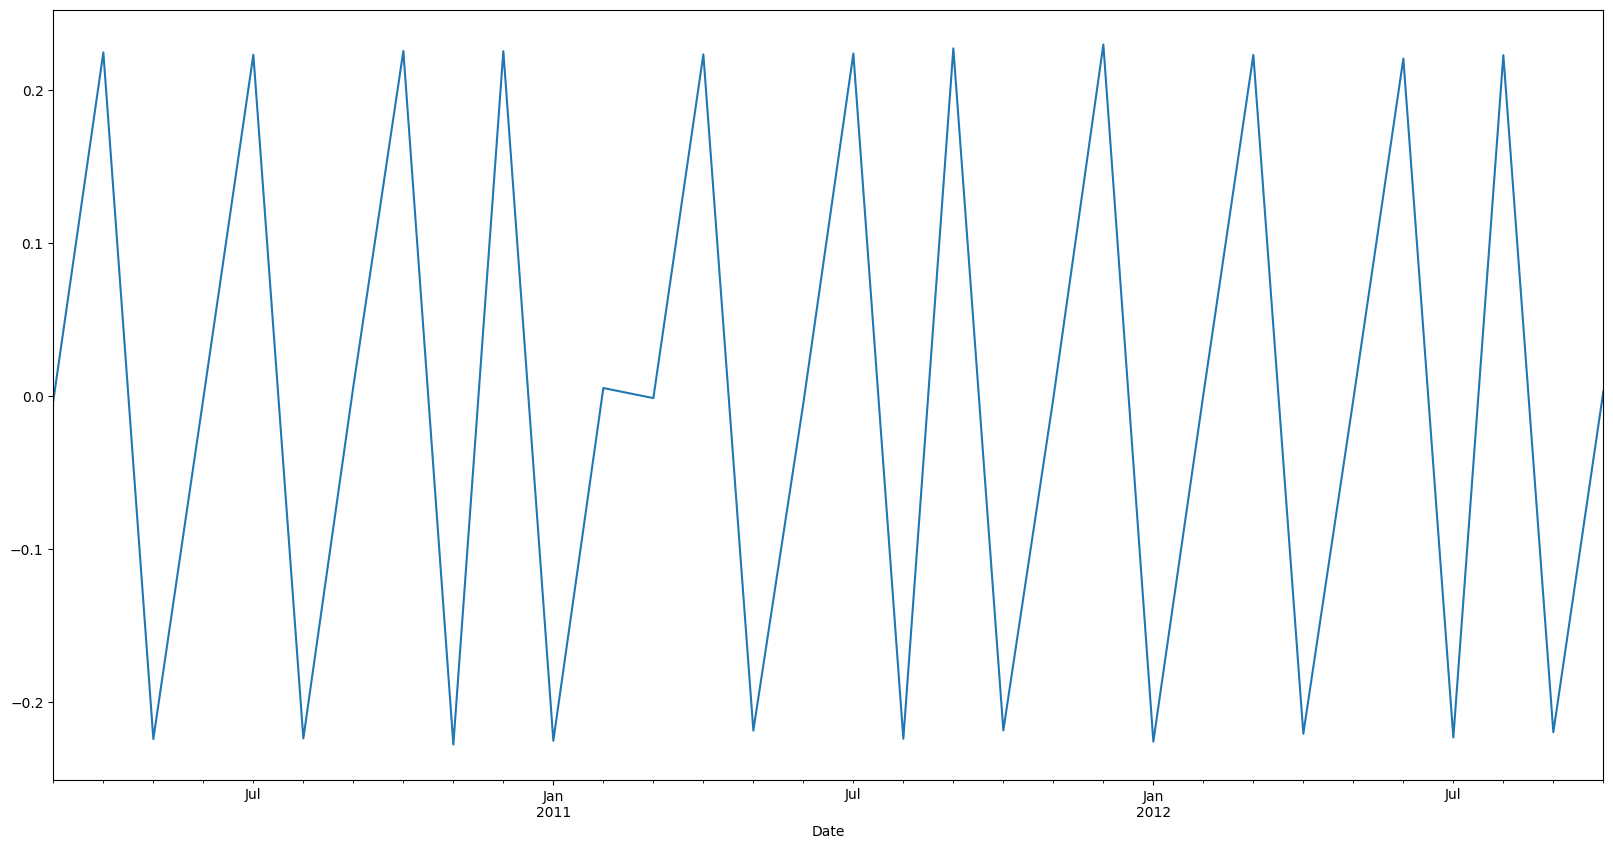

In [ ]:
y_log_diff.plot()

In [ ]:
kpss(y_log_diff, nlags="auto")

<ipython-input-106-81aa486ac913>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(y_log_diff, nlags="auto")


(0.2640434209124555,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## data is stationary

In [ ]:
dftest = adfuller(y_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                 -3.627219
p-value                         0.005261
#Lags Used                      7.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


## Here, p-value<0.05, data is stationary.

## Time series forecasting is the task of predicting future values based on historical data

In [ ]:
#ARMA--it doesn’t capture seasonal trends. It also assumes that the time series data is stationary, meaning that its statistical properties wouldn’t change over time.
#ARIMA--it doesn’t assume stationarity but does still assume that the data exhibits little to no seasonality.
#SARIMA--work with non-stationary data and capture some seasonality


# The ARIMA Model--
- Autoregressive Integrated Moving Average (ARIMA) model
- that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.
- AR(refers to the number of lags to use in the model)
- MA(refers the number of lagged forecast error used for ARIMA model)
- I(differencing to make time series stationary)

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
p=0
d=0
q=2
#y_log_diff = y_log.diff().dropna()
model = ARIMA(y_log_diff, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(12)

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     AvgWeeklySalesperDept   No. Observations:                   32
Model:                    ARIMA(0, 0, 2)   Log Likelihood                  35.722
Date:                   Wed, 22 Nov 2023   AIC                            -63.444
Time:                           13:06:01   BIC                            -57.581
Sample:                       03-31-2010   HQIC                           -61.501
                            - 10-31-2012                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      3.580      0.000       0.000       0.001
ma.L1         -1.9821    121.594     -0.016      0.987    -240.303     236.338
ma.L2          0.9997    122.612      0.008      0.993    -239.316     241.315
sigma2         0.0046      0.569      0.008      0.993      -1.112       1.121
===================================================================================
Ljung-Box (L1) (Q):                   1.93   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.16   Prob(JB):                         0.49
Heteroskedasticity (H):               0.83   Skew:                             0.13
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

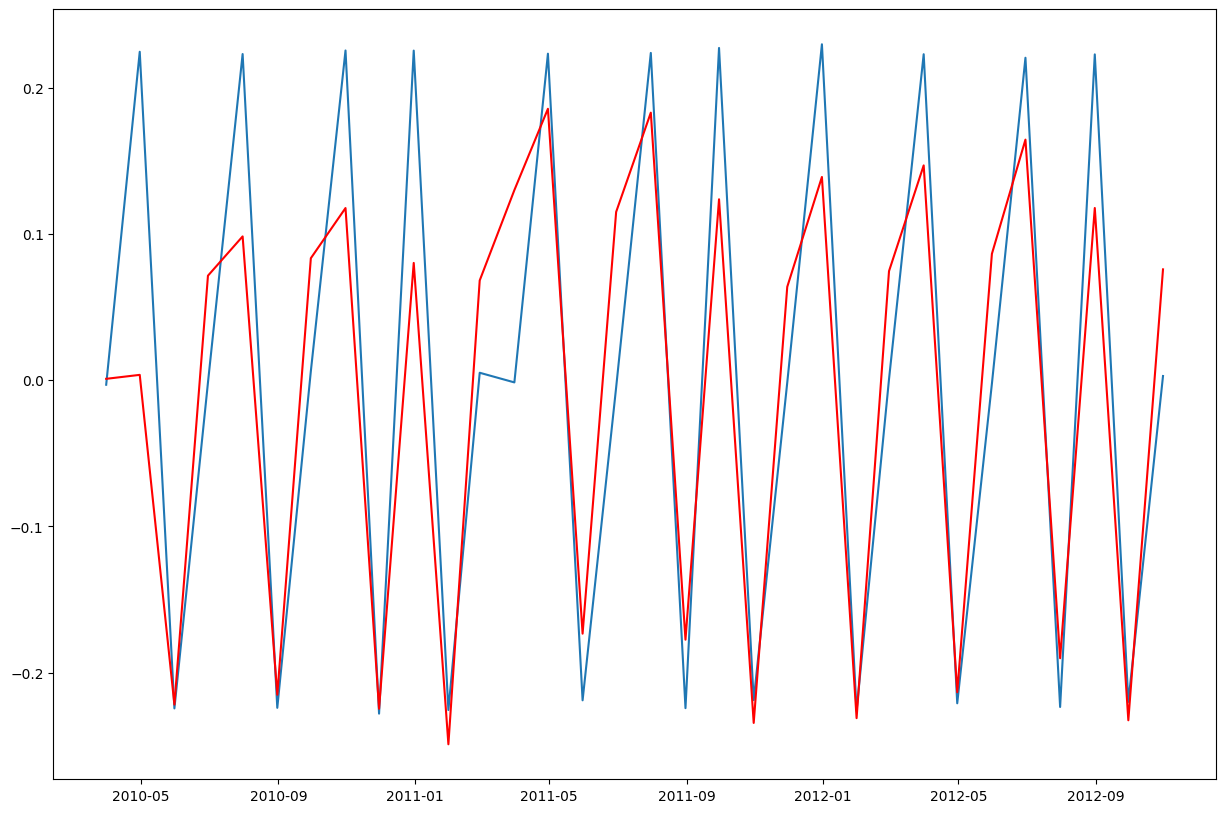

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_log_diff)
plt.plot(model_fit.predict(), color = 'red')

In [ ]:
p=0
d=0
q=2
#y_log_diff = y_log.diff().dropna()
model = ARIMA(y_log_diff, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=12)

<ipython-input-133-ccb70ab4e8a0>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plt.plot(y_log_diff['Oct 2012'].append(forecast.predicted_mean), color='red', label='Forecast')


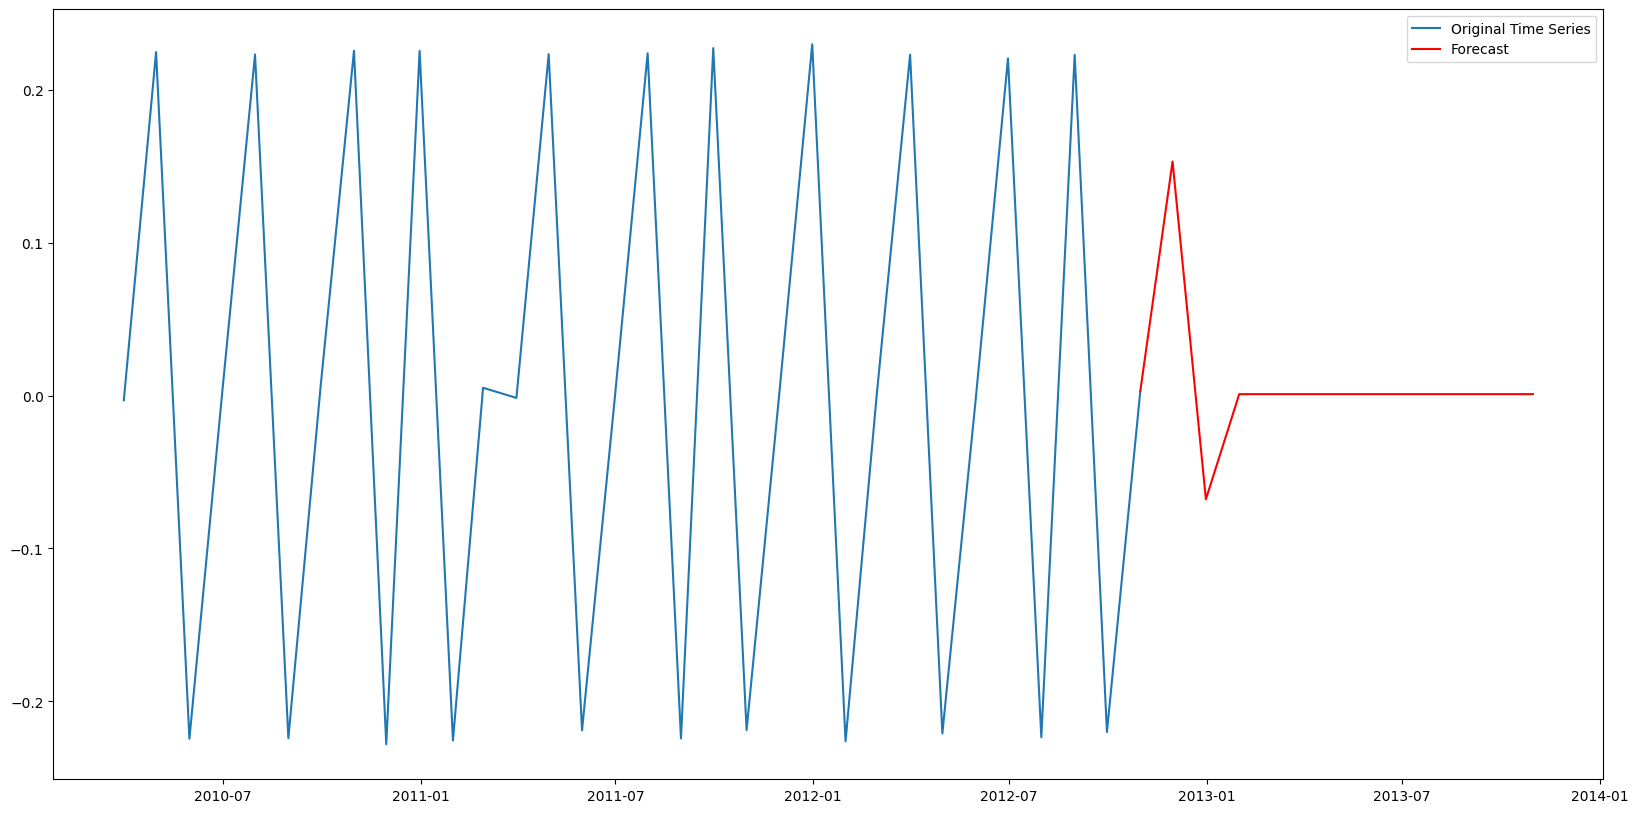

In [ ]:
forecast_steps = 12
plt.plot(y_log_diff, label='Original Time Series')
plt.plot(y_log_diff['Oct 2012'].append(forecast.predicted_mean), color='red', label='Forecast')
plt.legend()
plt.show()

The model has made quite good predictions. Sales seem to increase during June,November and December of every year.
It kind of remains average during other times of the year.

# Regression Analysis

In [ ]:
retail_data.head()

,Unnamed: 0.1,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,AvgWeeklySalesperStore,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,-1.732047,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,1,False,False,1,0,0,19213.485088
2010-02-05,-1.732038,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,2,False,False,1,0,0,43607.020113
2010-02-05,-1.732030,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,3,False,False,1,0,0,11793.698516
2010-02-05,-1.732022,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,4,False,False,1,0,0,25974.630238
2010-02-05,-1.732014,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.826302,0.024121,1,5,False,False,1,0,0,21365.583515


In [ ]:
retail_data.columns

Index(['Unnamed: 0.1', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'AvgWeeklySalesperStore',
       'AverageMonthlySales', 'Store', 'Dept', 'IsHoliday_x', 'IsHoliday_y',
       'Type_A', 'Type_B', 'Type_C', 'AvgWeeklySalesperDept'],
      dtype='object')

In [ ]:
retail_data.shape

(421570, 23)

In [ ]:
# Defining the dependent variable
y = retail_data["AvgWeeklySalesperDept"]

In [ ]:
# Defining the independent variable
x = retail_data.drop(['AvgWeeklySalesperDept'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=123)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
model = regressor.fit(x_train,y_train)

In [ ]:
# Training data score
model.score(x_train,y_train)

0.9999441801094088

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([ 4747.85618777,  4651.7296582 ,  4118.19720847, ...,
       44900.70272727,  4651.7296582 , 10187.1204975 ])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#We build various Time Series Forecast models and compare the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error) values for all the models. Lower values of RMSE and MAPE are desired to conclude that a model performs better. Accuracy is calculated as (100 — MAPE). Lower the MAPE value, higher is the accuracy.
mse = mean_squared_error(y_test,y_pred)
print("RMSE is " , np.sqrt(mse))

RMSE is  4594.117722910614


Text(0, 0.5, 'Predicted Sales per Dept')

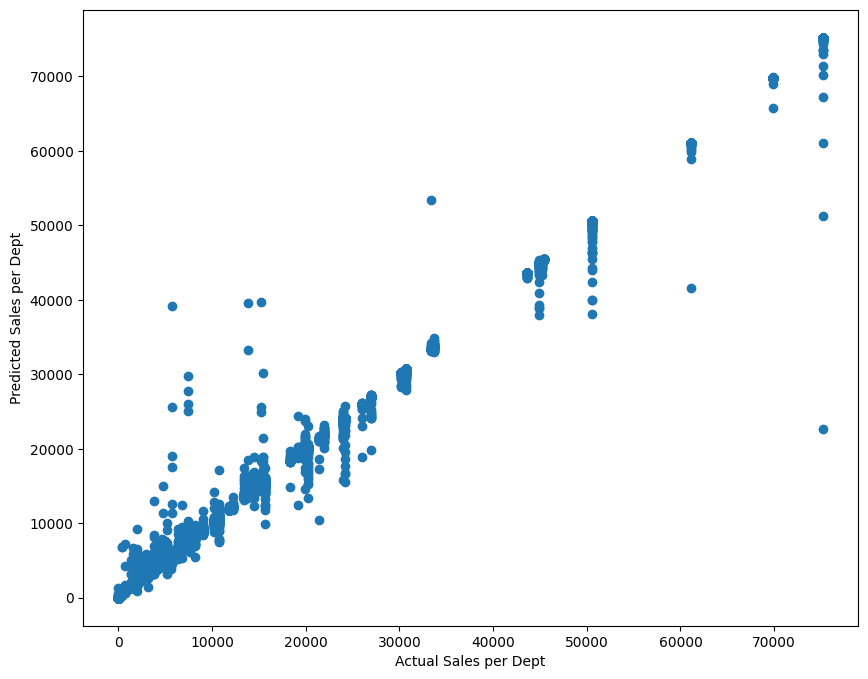

In [ ]:
# Correlation between actual and predicted values
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales per Dept')
plt.ylabel('Predicted Sales per Dept')

- It is found that there is a good correlation between the values using Random Forest algorithm

RMSE is  4594.117722910614


Text(0, 0.5, 'Predicted Sales per Dept')

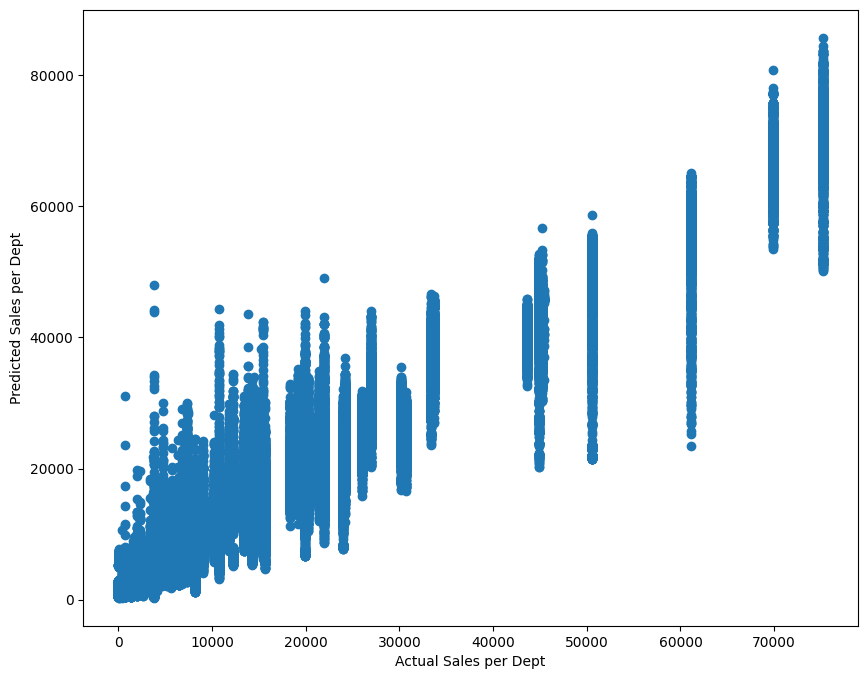

In [ ]:
# Gradient Boosting
regressor = GradientBoostingRegressor()
model = regressor.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("RMSE is " , np.sqrt(mse))
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales per Dept')
plt.ylabel('Predicted Sales per Dept')

- It is found that there is a good correlation between the values using Gradient Boosting algorithm

Text(0, 0.5, 'Predicted Sales per Dept')

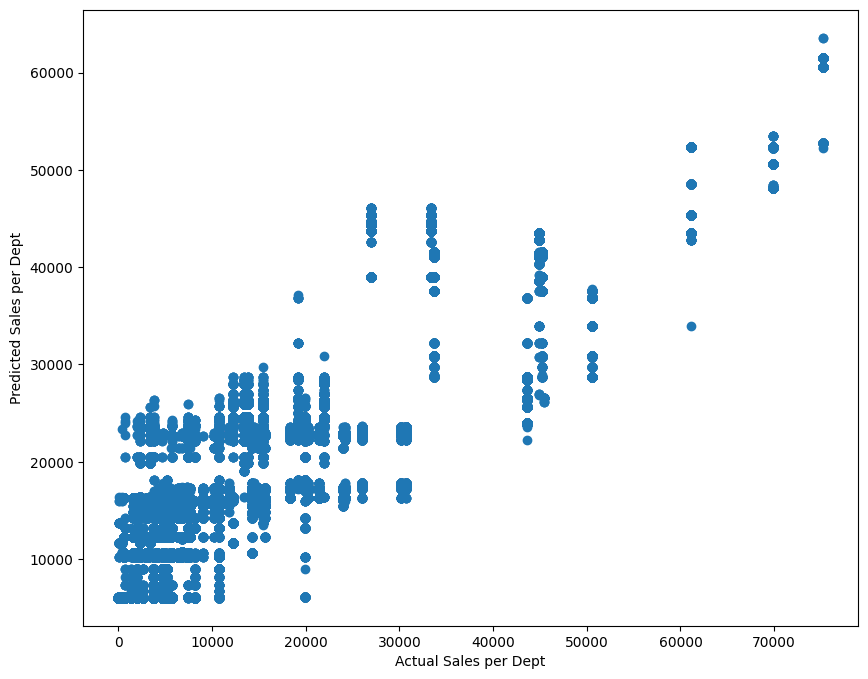

In [ ]:
# Ada Boosting
regressor = AdaBoostRegressor()
model = regressor.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("RMSE is " , np.sqrt(mse))
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales per Dept')
plt.ylabel('Predicted Sales per Dept')

- It is found that there is a good correlation between the values using Ada Boosting algorithm

Text(0, 0.5, 'Predicted Sales per Dept')

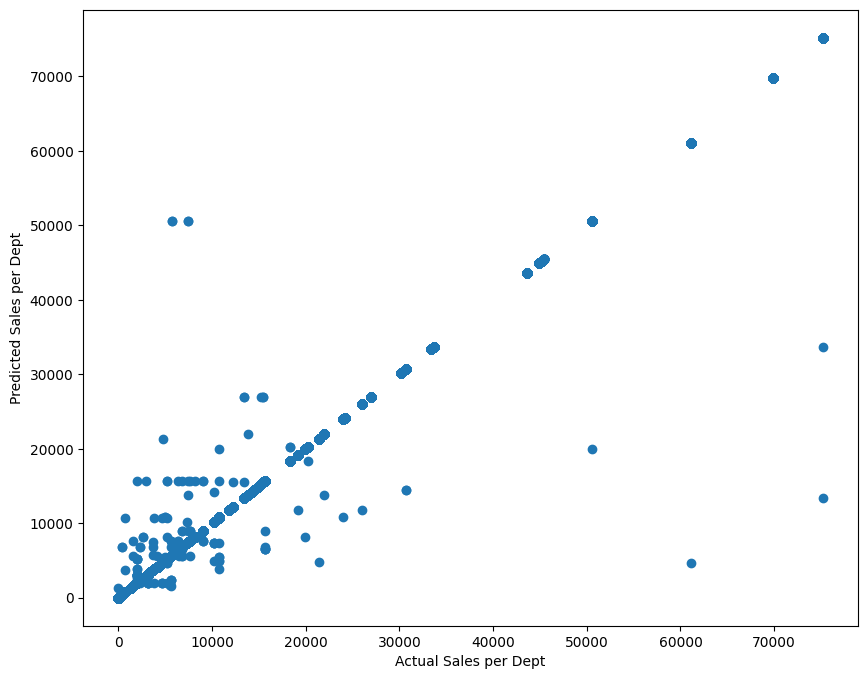

In [ ]:
# Decision Tree
regressor = DecisionTreeRegressor()
model = regressor.fit(x_train,y_train)
model.score(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("RMSE is " , np.sqrt(mse))
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales per Dept')
plt.ylabel('Predicted Sales per Dept')

- less correlation between the values using Decision Tree

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression()
model = linear.fit(x_train,y_train)
model.score(x_train,y_train)

0.6328687925961044

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([ 3435.51597179, 13508.49133724, 11599.11677236, ...,
       26841.17837848,  5598.38453384, 14099.17569765])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_2 = r2_score(y_test,y_pred)
print("R^2 is ", r_2)
mse = mean_squared_error(y_test,y_pred)
print("RMSE is ", np.sqrt(mse))

R^2 is  0.6208110310103923
RMSE is  10248.50602811287


R^2 is only 0.62 which implies that the model can predict only 60% of the data and the remaining 40% cannot be predicted.
RMSE is also higher than the RMSE of random forest model.

Text(0, 0.5, 'Predicted sales per dept')

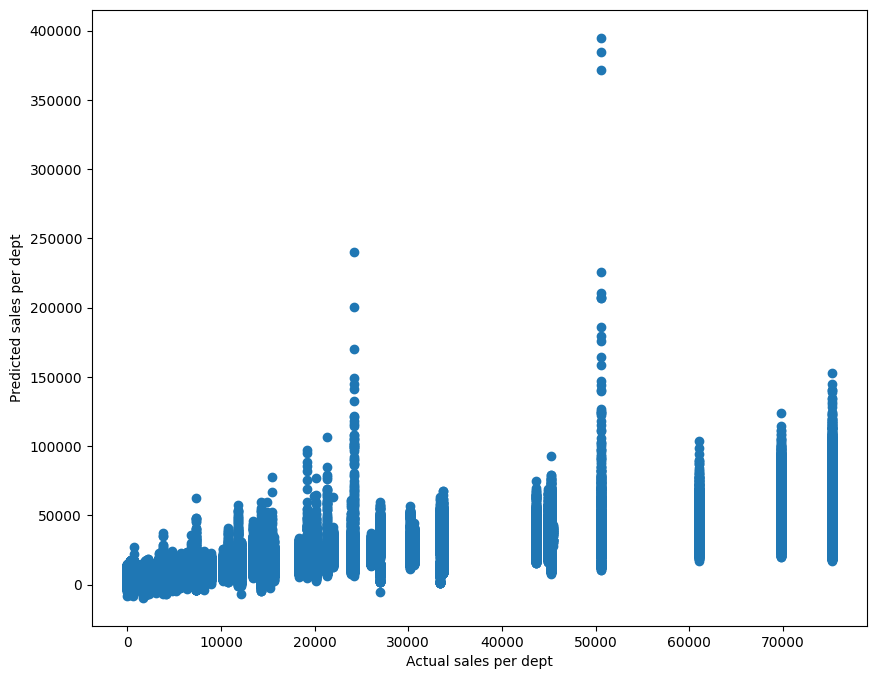

In [ ]:
# Correlation between actual and predicted values
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales per dept')
plt.ylabel('Predicted sales per dept')

From the above graph, linear regression doesn't fit the data as there is no correlation between the actual and predicted values.